# **1. Perkenalan Dataset**



# UCI Heart Disease Dataset

The dataset used in this project is the **UCI Heart Disease Dataset**, retrieved from **Kaggle**.

This is a **multivariate dataset**, meaning it includes multiple variables for each data point. It consists of **14 selected attributes** out of a total of 76. Although the full database contains more information, most studies—including this one—focus on the 14 key attributes derived from the **Cleveland database**, which is the most commonly used subset in machine learning research.

The primary goal with this dataset is to:
- **Predict** whether a patient has heart disease based on the provided attributes.
- **Diagnose** and uncover meaningful insights that may help in understanding and managing heart disease.

---

## 📄 Dataset Content

### Column Descriptions

| Column      | Description |
|-------------|-------------|
| `id`        | Unique ID for each patient |
| `age`       | Age of the patient in years |
| `origin`    | Place of study |
| `sex`       | Sex (Male/Female) |
| `cp`        | Chest pain type (`typical angina`, `atypical angina`, `non-anginal`, `asymptomatic`) |
| `trestbps`  | Resting blood pressure (in mm Hg on admission to the hospital) |
| `chol`      | Serum cholesterol in mg/dl |
| `fbs`       | Fasting blood sugar > 120 mg/dl (True/False) |
| `restecg`   | Resting electrocardiographic results (`normal`, `ST-T abnormality`, `left ventricular hypertrophy`) |
| `thalach`   | Maximum heart rate achieved |
| `exang`     | Exercise-induced angina (True/False) |
| `oldpeak`   | ST depression induced by exercise relative to rest |
| `slope`     | The slope of the peak exercise ST segment |
| `ca`        | Number of major vessels (0-3) colored by fluoroscopy |
| `thal`      | Thalassemia (`normal`, `fixed defect`, `reversible defect`) |
| `num`       | The predicted attribute (presence of heart disease) |

---

## 🙏 Acknowledgements

### Creators
- **Hungarian Institute of Cardiology, Budapest**: Andras Janosi, M.D.
- **University Hospital, Zurich, Switzerland**: William Steinbrunn, M.D.
- **University Hospital, Basel, Switzerland**: Matthias Pfisterer, M.D.
- **V.A. Medical Center, Long Beach and Cleveland Clinic Foundation**: Robert Detrano, M.D., Ph.D.

---

## 📚 Relevant Papers

- Detrano, R., Janosi, A., Steinbrunn, W., Pfisterer, M., Schmid, J., Sandhu, S., Guppy, K., Lee, S., & Froelicher, V. (1989). *International application of a new probability algorithm for the diagnosis of coronary artery disease*. *American Journal of Cardiology*, 64, 304–310.

- David W. Aha & Dennis Kibler. *Instance-based prediction of heart-disease presence with the Cleveland database.*

- Gennari, J.H., Langley, P., & Fisher, D. (1989). *Models of incremental concept formation*. *Artificial Intelligence*, 40, 11–61.

---

## 📌 Citation Request

If you use this dataset in your publication, please include the names of the principal investigators:

- **Hungarian Institute of Cardiology, Budapest**: Andras Janosi, M.D.
- **University Hospital, Zurich, Switzerland**: William Steinbrunn, M.D.
- **University Hospital, Basel, Switzerland**: Matthias Pfisterer, M.D.
- **V.A. Medical Center, Long Beach and Cleveland Clinic Foundation**: Robert Detrano, M.D., Ph.D.


# **2. Import Library**

These are all library needed in this project

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patheffects as path_effects
import textwrap
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from joblib import dump
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, FunctionTransformer
from sklearn.model_selection import train_test_split
import os

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

Jika dataset berupa unstructured data, silakan sesuaikan dengan format seperti kelas Machine Learning Pengembangan atau Machine Learning Terapan

In [2]:
df = pd.read_csv('../dataset/heart_disease_uci_raw.csv')

df

,id,age,sex,origin,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,1,63,Male,Cleveland,typical angina,145.0,233.0,True,lv hypertrophy,150.0,False,2.3,downsloping,0.0,fixed defect,0
1,2,67,Male,Cleveland,asymptomatic,160.0,286.0,False,lv hypertrophy,108.0,True,1.5,flat,3.0,normal,2
2,3,67,Male,Cleveland,asymptomatic,120.0,229.0,False,lv hypertrophy,129.0,True,2.6,flat,2.0,reversable defect,1
3,4,37,Male,Cleveland,non-anginal,130.0,250.0,False,normal,187.0,False,3.5,downsloping,0.0,normal,0
4,5,41,Female,Cleveland,atypical angina,130.0,204.0,False,lv hypertrophy,172.0,False,1.4,upsloping,0.0,normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
915,916,54,Female,VA Long Beach,asymptomatic,127.0,333.0,True,st-t abnormality,154.0,False,0.0,NaN,NaN,NaN,1
916,917,62,Male,VA Long Beach,typical angina,NaN,139.0,False,st-t abnormality,NaN,NaN,NaN,NaN,NaN,NaN,0
917,918,55,Male,VA Long Beach,asymptomatic,122.0,223.0,True,st-t abnormality,100.0,False,0.0,NaN,NaN,fixed defect,2
918,919,58,Male,VA Long Beach,asymptomatic,NaN,385.0,True,lv hypertrophy,NaN,NaN,NaN,NaN,NaN,NaN,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 920 entries, 0 to 919
Data columns (total 16 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        920 non-null    int64  
 1   age       920 non-null    int64  
 2   sex       920 non-null    object 
 3   origin    920 non-null    object 
 4   cp        920 non-null    object 
 5   trestbps  861 non-null    float64
 6   chol      890 non-null    float64
 7   fbs       830 non-null    object 
 8   restecg   918 non-null    object 
 9   thalach   865 non-null    float64
 10  exang     865 non-null    object 
 11  oldpeak   858 non-null    float64
 12  slope     611 non-null    object 
 13  ca        309 non-null    float64
 14  thal      434 non-null    object 
 15  num       920 non-null    int64  
dtypes: float64(5), int64(3), object(8)
memory usage: 115.1+ KB


In [4]:
df.nunique()

id          920
age          50
sex           2
origin        4
cp            4
trestbps     61
chol        217
fbs           2
restecg       3
thalach     119
exang         2
oldpeak      53
slope         3
ca            4
thal          3
num           5
dtype: int64

In [5]:
df.isna().sum()

id            0
age           0
sex           0
origin        0
cp            0
trestbps     59
chol         30
fbs          90
restecg       2
thalach      55
exang        55
oldpeak      62
slope       309
ca          611
thal        486
num           0
dtype: int64

In [6]:
print("Jumlah duplikasi: ", df.duplicated().sum())

Jumlah duplikasi:  0


In [7]:
df.describe()

,id,age,trestbps,chol,thalach,oldpeak,ca,num
count,920.000000,920.000000,861.000000,890.000000,865.000000,858.000000,309.000000,920.000000
mean,460.500000,53.510870,132.132404,199.130337,137.545665,0.878788,0.676375,0.995652
std,265.725422,9.424685,19.066070,110.780810,25.926276,1.091226,0.935653,1.142693
min,1.000000,28.000000,0.000000,0.000000,60.000000,-2.600000,0.000000,0.000000
25%,230.750000,47.000000,120.000000,175.000000,120.000000,0.000000,0.000000,0.000000
50%,460.500000,54.000000,130.000000,223.000000,140.000000,0.500000,0.000000,1.000000
75%,690.250000,60.000000,140.000000,268.000000,157.000000,1.500000,1.000000,2.000000
max,920.000000,77.000000,200.000000,603.000000,202.000000,6.200000,3.000000,4.000000


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

## **Univariate EDA**

In [8]:
df.describe(include="all")

,id,age,sex,origin,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
count,920.000000,920.000000,920,920,920,861.000000,890.000000,830,918,865.000000,865,858.000000,611,309.000000,434,920.000000
unique,NaN,NaN,2,4,4,NaN,NaN,2,3,NaN,2,NaN,3,NaN,3,NaN
top,NaN,NaN,Male,Cleveland,asymptomatic,NaN,NaN,False,normal,NaN,False,NaN,flat,NaN,normal,NaN
freq,NaN,NaN,726,304,496,NaN,NaN,692,551,NaN,528,NaN,345,NaN,196,NaN
mean,460.500000,53.510870,NaN,NaN,NaN,132.132404,199.130337,NaN,NaN,137.545665,NaN,0.878788,NaN,0.676375,NaN,0.995652
std,265.725422,9.424685,NaN,NaN,NaN,19.066070,110.780810,NaN,NaN,25.926276,NaN,1.091226,NaN,0.935653,NaN,1.142693
min,1.000000,28.000000,NaN,NaN,NaN,0.000000,0.000000,NaN,NaN,60.000000,NaN,-2.600000,NaN,0.000000,NaN,0.000000
25%,230.750000,47.000000,NaN,NaN,NaN,120.000000,175.000000,NaN,NaN,120.000000,NaN,0.000000,NaN,0.000000,NaN,0.000000
50%,460.500000,54.000000,NaN,NaN,NaN,130.000000,223.000000,NaN,NaN,140.000000,NaN,0.500000,NaN,0.000000,NaN,1.000000
75%,690.250000,60.000000,NaN,NaN,NaN,140.000000,268.000000,NaN,NaN,157.000000,NaN,1.500000,NaN,1.000000,NaN,2.000000


In [9]:
df.id.is_unique

True

In [10]:
df.groupby(by="sex").agg({
    "age": ["mean", "min", "max"],
    "trestbps": ["mean", "min", "max"],
    "chol": ["mean", "min", "max"],
    "thalach": ["mean", "min", "max"],
    "oldpeak": ["mean", "min", "max"],
    "ca": ["mean", "min", "max"],
})

age            trestbps                     chol              \
             mean min max        mean   min    max        mean  min    max   
sex                                                                          
Female  52.474227  30  76  132.093750  94.0  200.0  241.481283  0.0  564.0   
Male    53.787879  28  77  132.143498   0.0  200.0  187.864865  0.0  603.0   

           thalach                oldpeak                  ca            
              mean   min    max      mean  min  max      mean  min  max  
sex                                                                      
Female  146.244792  90.0  192.0  0.668394  0.0  6.2  0.546392  0.0  3.0  
Male    135.063893  60.0  202.0  0.939850 -2.6  5.6  0.735849  0.0  3.0

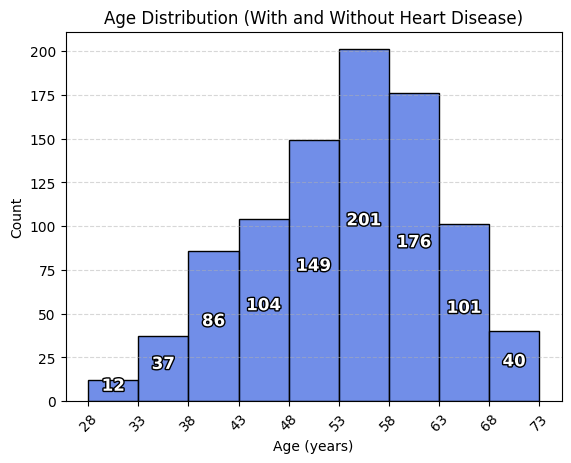

In [11]:
bins = np.arange(df["age"].min(), df["age"].max() + 1, 5)

ax = sns.histplot(df, x="age", bins=bins, color="royalblue", edgecolor="black")

for p in ax.patches:
    height = p.get_height()
    if height > 0:
        text = ax.text(
                p.get_x() + p.get_width()/2, height/2, f"{int(height)}",
                ha="center", fontsize=12, color="white", weight="bold"
            )
        text.set_path_effects([path_effects.Stroke(linewidth=2, foreground="black"), path_effects.Normal()])

ax.set_xticks(bins)
ax.set_xticklabels(bins, rotation=45)

plt.xlabel("Age (years)")
plt.ylabel("Count")
plt.title("Age Distribution (With and Without Heart Disease)")

plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.show()

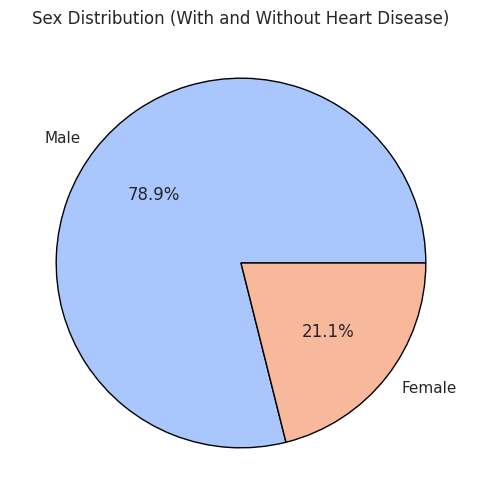

In [12]:
counts = df["sex"].value_counts()

sns.set_theme(style="whitegrid")

plt.figure(figsize=(6, 6))
plt.pie(counts, labels=counts.index, autopct="%1.1f%%", colors=sns.color_palette("coolwarm", len(counts)), wedgeprops={"edgecolor": "black"})

plt.title("Sex Distribution (With and Without Heart Disease)")

plt.show()

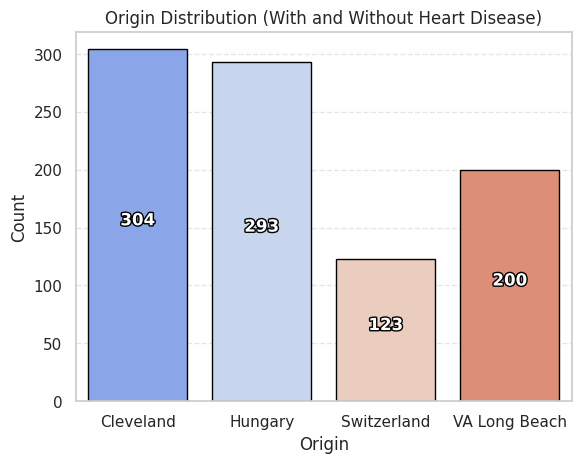

In [13]:
ax = sns.countplot(x="origin",hue="origin", data=df, edgecolor="black", palette="coolwarm")

for p in ax.patches:
    height = p.get_height()
    if height > 0:
        text = ax.text(
            p.get_x() + p.get_width()/2, height/2, f"{int(height)}",
            ha="center", fontsize=12, color="white", weight="bold"
        )
        text.set_path_effects([path_effects.Stroke(linewidth=2, foreground="black"), path_effects.Normal()])

plt.xlabel("Origin")
plt.ylabel("Count")
plt.title("Origin Distribution (With and Without Heart Disease)")

plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.show()


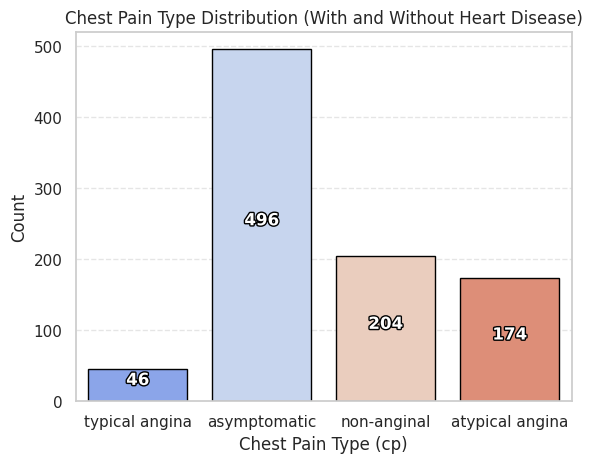

In [14]:
ax = sns.countplot(x="cp",hue="cp", data=df, edgecolor="black", palette="coolwarm")

for p in ax.patches:
    height = p.get_height()
    if height > 0:
        text = ax.text(
            p.get_x() + p.get_width()/2, height/2, f"{int(height)}",
            ha="center", fontsize=12, color="white", weight="bold"
        )
        text.set_path_effects([path_effects.Stroke(linewidth=2, foreground="black"), path_effects.Normal()])

plt.xlabel("Chest Pain Type (cp)")
plt.ylabel("Count")
plt.title("Chest Pain Type Distribution (With and Without Heart Disease)")

plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.show()


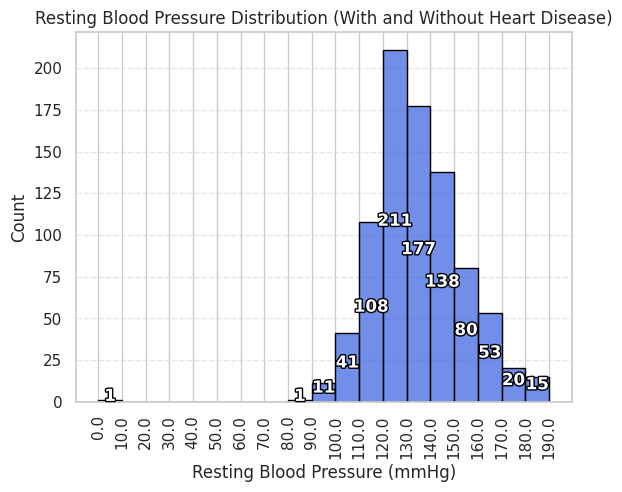

In [15]:
bins = np.arange(df["trestbps"].min(), df["trestbps"].max(), 10)

ax = sns.histplot(df, x="trestbps", bins=bins, color="royalblue", edgecolor="black")

for p in ax.patches:
    height = p.get_height()
    if height > 0:
        text = ax.text(
                p.get_x() + p.get_width()/2, height/2, f"{int(height)}",
                ha="center", fontsize=12, color="white", weight="bold"
            )
        text.set_path_effects([path_effects.Stroke(linewidth=2, foreground="black"), path_effects.Normal()])

ax.set_xticks(bins)
ax.set_xticklabels(bins, rotation=90)

plt.xlabel("Resting Blood Pressure (mmHg)")
plt.ylabel("Count")
plt.title("Resting Blood Pressure Distribution (With and Without Heart Disease)")

plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.show()

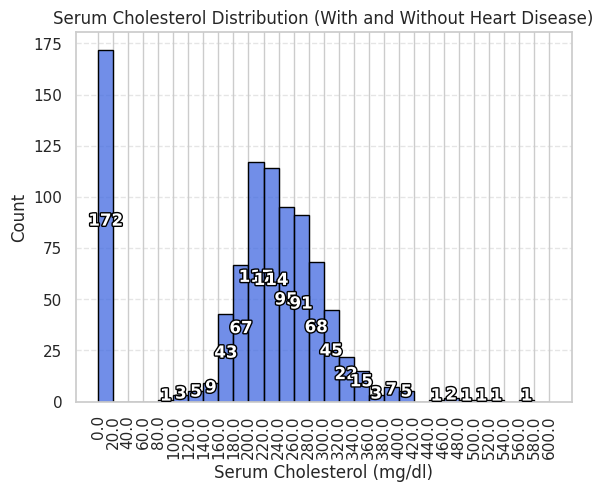

In [16]:
bins = np.arange(df["chol"].min(), df["chol"].max(), 20)

ax = sns.histplot(df, x="chol", bins=bins, color="royalblue", edgecolor="black")

for p in ax.patches:
    height = p.get_height()
    if height > 0:
        text = ax.text(
                p.get_x() + p.get_width()/2, height/2, f"{int(height)}",
                ha="center", fontsize=12, color="white", weight="bold"
            )
        text.set_path_effects([path_effects.Stroke(linewidth=2, foreground="black"), path_effects.Normal()])

ax.set_xticks(bins)
ax.set_xticklabels(bins, rotation=90)

plt.xlabel("Serum Cholesterol (mg/dl)")
plt.ylabel("Count")
plt.title("Serum Cholesterol Distribution (With and Without Heart Disease)")

plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.show()

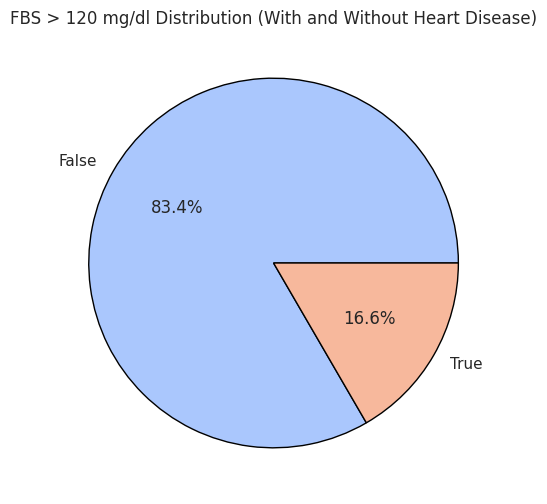

In [17]:
counts = df["fbs"].value_counts()

sns.set_theme(style="whitegrid")

plt.figure(figsize=(6, 6))
plt.pie(counts, labels=counts.index, autopct="%1.1f%%", colors=sns.color_palette("coolwarm", len(counts)), wedgeprops={"edgecolor": "black"})

plt.title("FBS > 120 mg/dl Distribution (With and Without Heart Disease)")

plt.show()


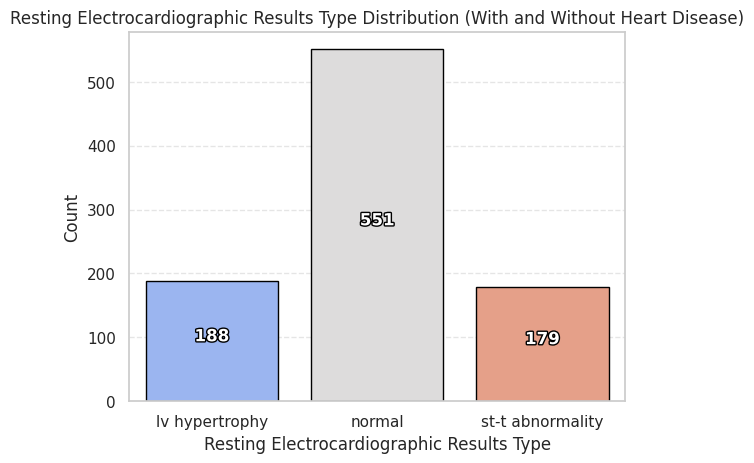

In [18]:
ax = sns.countplot(x="restecg",hue="restecg", data=df, edgecolor="black", palette="coolwarm")
ax.legend_.remove()

for p in ax.patches:
    height = p.get_height()
    if height > 0:
        text = ax.text(
            p.get_x() + p.get_width()/2, height/2, f"{int(height)}",
            ha="center", fontsize=12, color="white", weight="bold"
        )
        text.set_path_effects([path_effects.Stroke(linewidth=2, foreground="black"), path_effects.Normal()])

plt.xlabel("Resting Electrocardiographic Results Type")
plt.ylabel("Count")
plt.title("Resting Electrocardiographic Results Type Distribution (With and Without Heart Disease)")

plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.show()


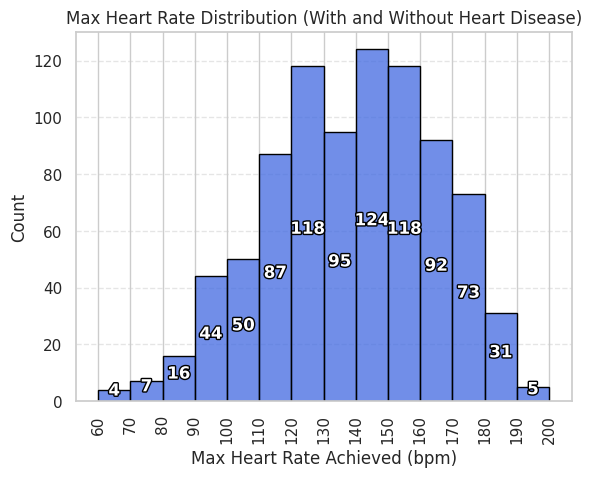

In [19]:
bins = np.arange(df["thalach"].min(), df["thalach"].max(), 10)

ax = sns.histplot(df, x="thalach", bins=bins, color="royalblue", edgecolor="black")

for p in ax.patches:
    height = p.get_height()
    if height > 0:
        text = ax.text(
                p.get_x() + p.get_width()/2, height/2, f"{int(height)}",
                ha="center", fontsize=12, color="white", weight="bold"
            )
        text.set_path_effects([path_effects.Stroke(linewidth=2, foreground="black"), path_effects.Normal()])

ax.set_xticks(bins)
ax.set_xticklabels([f"{b:.0f}" for b in bins], rotation=90)

plt.xlabel("Max Heart Rate Achieved (bpm)")
plt.ylabel("Count")
plt.title("Max Heart Rate Distribution (With and Without Heart Disease)")

plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.show()

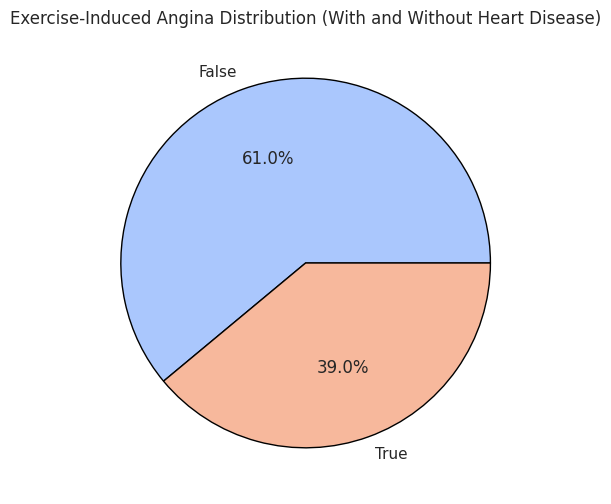

In [20]:
counts = df["exang"].value_counts()

sns.set_theme(style="whitegrid")

plt.figure(figsize=(6, 6))
plt.pie(counts, labels=counts.index, autopct="%1.1f%%", colors=sns.color_palette("coolwarm", len(counts)), wedgeprops={"edgecolor": "black"})

plt.title("Exercise-Induced Angina Distribution (With and Without Heart Disease)")

plt.show()


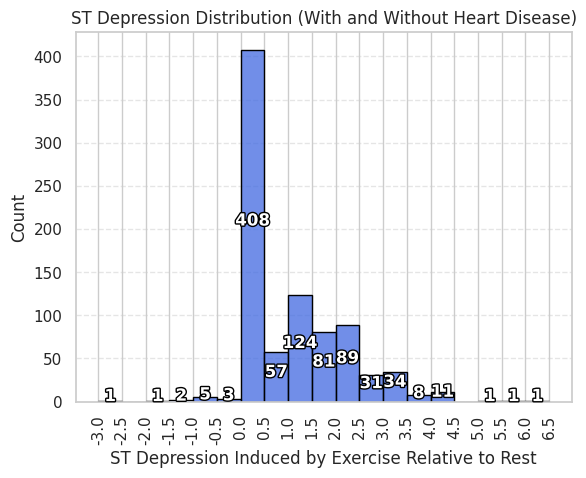

In [21]:
bin_width = 0.5

min_val = np.floor(df["oldpeak"].min() / bin_width) * bin_width
max_val = np.ceil(df["oldpeak"].max() / bin_width) * bin_width

# Generate aligned bins
bins = np.arange(min_val, max_val + bin_width, bin_width)

ax = sns.histplot(df, x="oldpeak", bins=bins, color="royalblue", edgecolor="black")

for p in ax.patches:
    height = p.get_height()
    if height > 0:
        text = ax.text(
                p.get_x() + p.get_width()/2, height/2, f"{int(height)}",
                ha="center", fontsize=12, color="white", weight="bold"
            )
        text.set_path_effects([path_effects.Stroke(linewidth=2, foreground="black"), path_effects.Normal()])

ax.set_xticks(bins)
ax.set_xticklabels(bins, rotation=90)

plt.xlabel("ST Depression Induced by Exercise Relative to Rest")
plt.ylabel("Count")
plt.title("ST Depression Distribution (With and Without Heart Disease)")

plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.show()

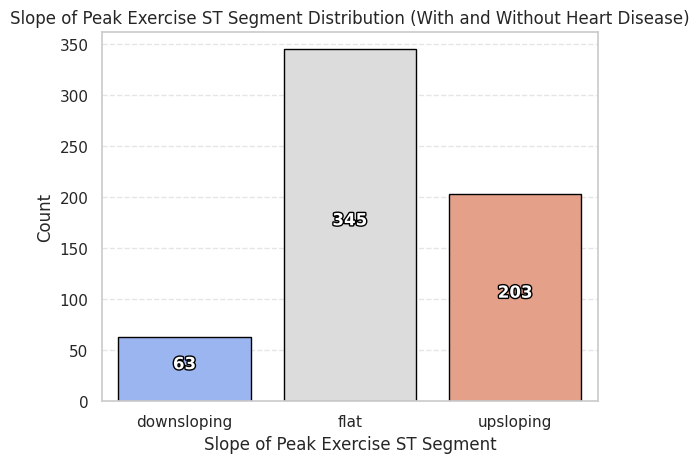

In [22]:
ax = sns.countplot(x="slope",hue="slope", data=df, edgecolor="black", palette="coolwarm")
ax.legend_.remove()

for p in ax.patches:
    height = p.get_height()
    if height > 0:
        text = ax.text(
            p.get_x() + p.get_width()/2, height/2, f"{int(height)}",
            ha="center", fontsize=12, color="white", weight="bold"
        )
        text.set_path_effects([path_effects.Stroke(linewidth=2, foreground="black"), path_effects.Normal()])

plt.xlabel("Slope of Peak Exercise ST Segment")
plt.ylabel("Count")
plt.title("Slope of Peak Exercise ST Segment Distribution (With and Without Heart Disease)")

plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.show()


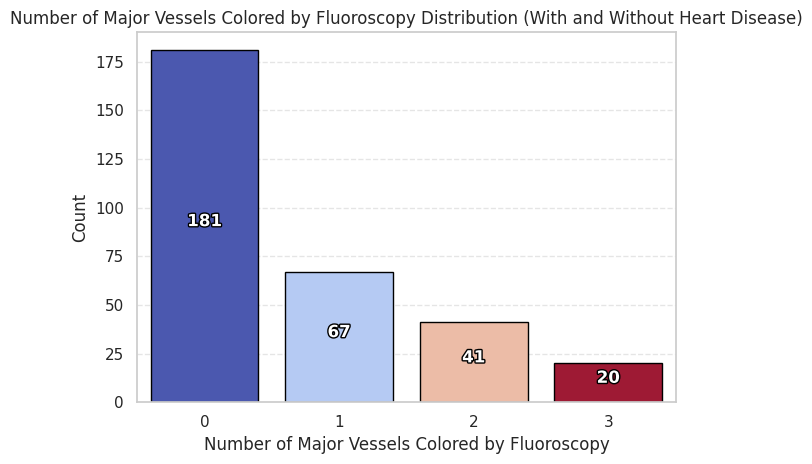

In [23]:
ax = sns.countplot(x="ca", hue="ca", data=df, edgecolor="black", palette="coolwarm")
ax.legend_.remove()

for p in ax.patches:
    height = p.get_height()
    if height > 0:
        text = ax.text(
            p.get_x() + p.get_width()/2, height/2, f"{int(height)}",
            ha="center", fontsize=12, color="white", weight="bold"
        )
        text.set_path_effects([
            path_effects.Stroke(linewidth=2, foreground="black"),
            path_effects.Normal()
        ])

# Ensure integer ticks on x-axis
xticks = sorted(df["ca"].dropna().unique())
ax.set_xticks(xticks)
ax.set_xticklabels([str(int(x)) for x in xticks])  # Convert to string of integers

plt.xlabel("Number of Major Vessels Colored by Fluoroscopy")
plt.ylabel("Count")
plt.title("Number of Major Vessels Colored by Fluoroscopy Distribution (With and Without Heart Disease)")

plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()


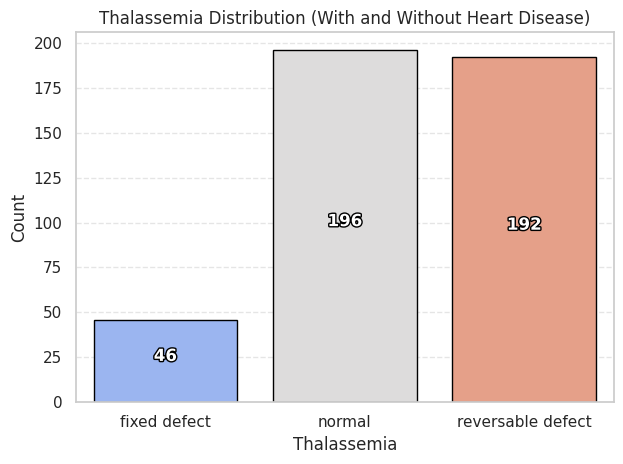

In [24]:
ax = sns.countplot(x="thal", hue="thal", data=df, edgecolor="black", palette="coolwarm")
ax.legend_.remove()

for p in ax.patches:
    height = p.get_height()
    if height > 0:
        text = ax.text(
            p.get_x() + p.get_width()/2, height/2, f"{int(height)}",
            ha="center", fontsize=12, color="white", weight="bold"
        )
        text.set_path_effects([
            path_effects.Stroke(linewidth=2, foreground="black"),
            path_effects.Normal()
        ])

# Ensure integer ticks on x-axis
xticks = sorted(df["thal"].dropna().unique())
ax.set_xticks(xticks)# Convert to string of integers

plt.xlabel("Thalassemia")
plt.ylabel("Count")
plt.title("Thalassemia Distribution (With and Without Heart Disease)")

plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()


## **Multivariate EDA**

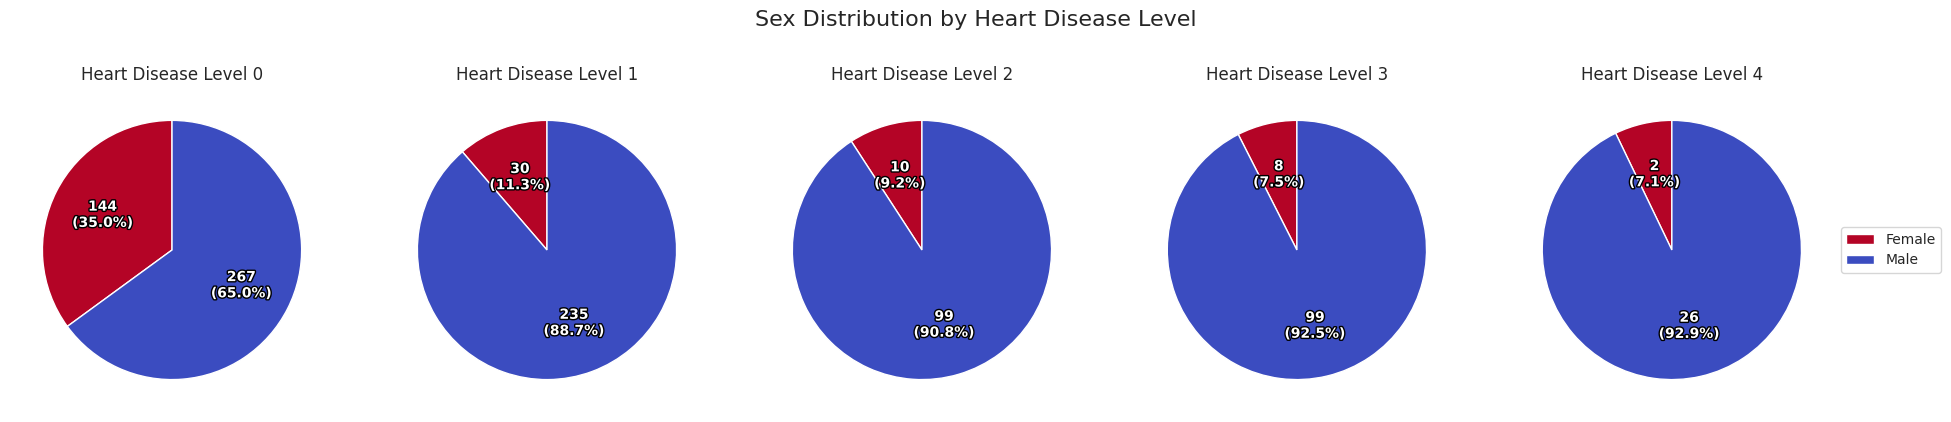

In [25]:
sorted_column_order = sorted(df["sex"].unique())
num_levels = sorted(df["num"].unique())

n_cols = 5
n_rows = int(np.ceil(len(num_levels) / n_cols))

fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 4, n_rows * 4))
axes = axes.flatten()

colors = plt.cm.coolwarm_r(np.linspace(0, 1, len(sorted_column_order)))


for i, num_level in enumerate(num_levels):
    ax = axes[i]
    subset = df[df["num"] == num_level]
    counts = subset["sex"].value_counts().reindex(sorted_column_order, fill_value=0)

    total = counts.sum()

    # Custom label function
    def make_label(pct, allvals):
        count = int(round(pct * total / 100.0))
        return f"{count}\n({pct:.1f}%)"

    wedges, texts, autotexts = ax.pie(
        counts,
        labels=None,
        autopct=lambda pct: make_label(pct, counts),
        startangle=90,
        colors=colors,
        textprops={'color': "white", 'weight': 'semibold', 'fontsize': 10}
    )
    for text in autotexts:
        text.set_path_effects([path_effects.Stroke(linewidth=2, foreground='black'), path_effects.Stroke()])

    ax.set_title(f"Heart Disease Level {num_level}", fontsize=12)

ax.legend(
    handles=wedges,
    labels=sorted_column_order,
    loc="center left",
    bbox_to_anchor=(1, 0.5),
    fontsize=10
)

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

fig.suptitle("Sex Distribution by Heart Disease Level", fontsize=16, y=1.05)
plt.tight_layout()
plt.show()


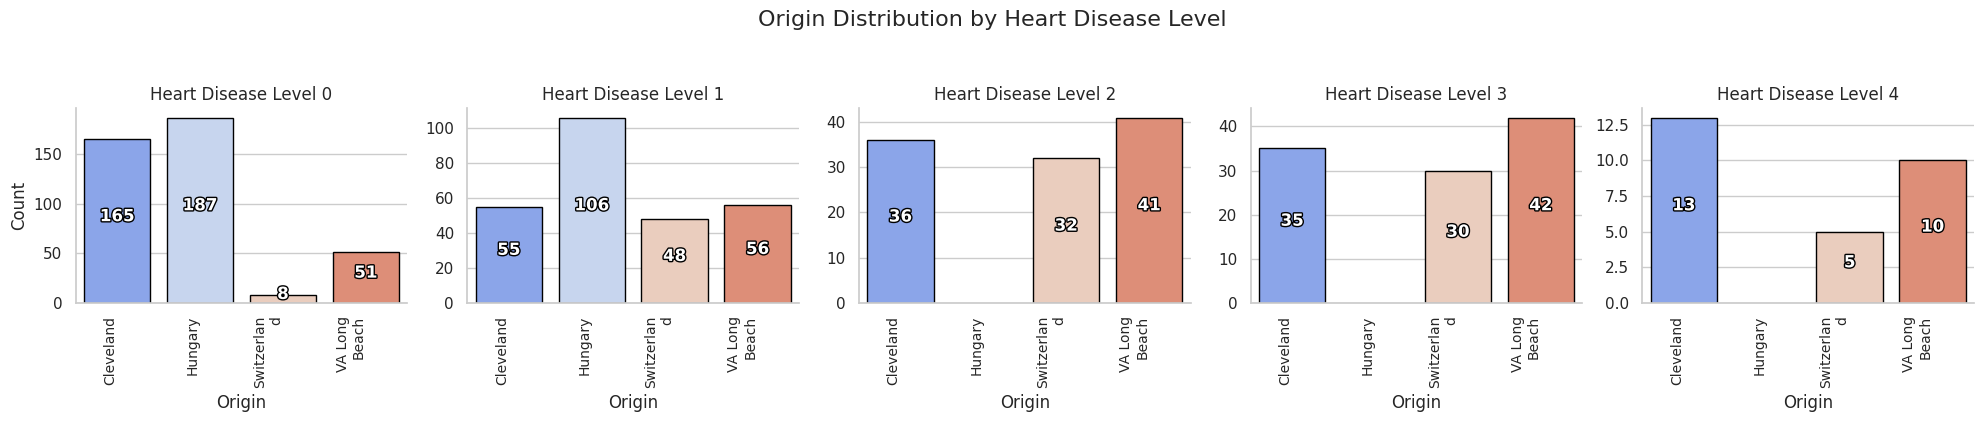

In [26]:
sorted_column_order = sorted(df["origin"].unique())

g = sns.FacetGrid(df, col="num", col_wrap=5, height=4, sharex=False, sharey=False)
g.map_dataframe(sns.countplot, x="origin", hue="origin", edgecolor="black", palette="coolwarm", hue_order=sorted_column_order, order=sorted_column_order)

g.set_titles("Heart Disease Level {col_name}")
g.set_axis_labels("Origin", "Count")

for ax in g.axes.flat:
    for p in ax.patches:
        height = p.get_height()
        if height > 0:
            text = ax.text(
                p.get_x() + p.get_width()/2, height/2, f"{int(height)}",
                ha="center", fontsize=12, color="white", weight="bold"
            )
            text.set_path_effects([path_effects.Stroke(linewidth=2, foreground="black"), path_effects.Normal()])
    ax.set_xticks(range(len(sorted_column_order)))
    ax.set_xticklabels([textwrap.fill(label, 10) for label in sorted_column_order], rotation=90, ha="right", fontsize=10)

plt.suptitle("Origin Distribution by Heart Disease Level", fontsize=16, y=1.05)
plt.tight_layout()
plt.show()


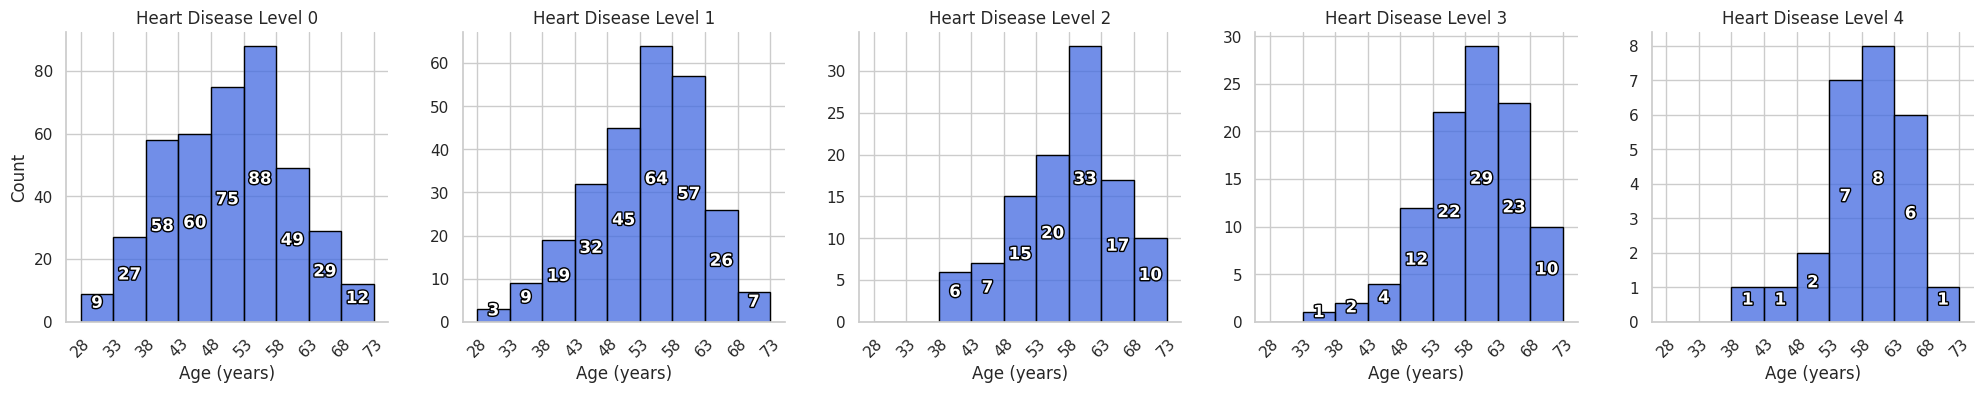

In [27]:
min_age, max_age = df["age"].min(), df["age"].max()

bins = np.arange(min_age, max_age + 1, 5)

g = sns.FacetGrid(df, col="num", col_wrap=5, height=4, sharex=False, sharey=False)
g.map_dataframe(sns.histplot, x="age", bins=bins, color="royalblue", edgecolor="black")

g.set_titles("Heart Disease Level {col_name}")
g.set_axis_labels("Age (years)", "Count")

for ax in g.axes.flat:
    ax.set_xticks(bins)
    ax.set_xticklabels([f"{b:.0f}" for b in bins], rotation=45)

    for p in ax.patches:
        height = p.get_height()
        if height > 0:
            text = ax.text(
                p.get_x() + p.get_width()/2, height/2, f"{int(height)}",
                ha="center", fontsize=12, color="white", weight="bold"
            )
            text.set_path_effects([path_effects.Stroke(linewidth=2, foreground="black"), path_effects.Normal()])

plt.show()


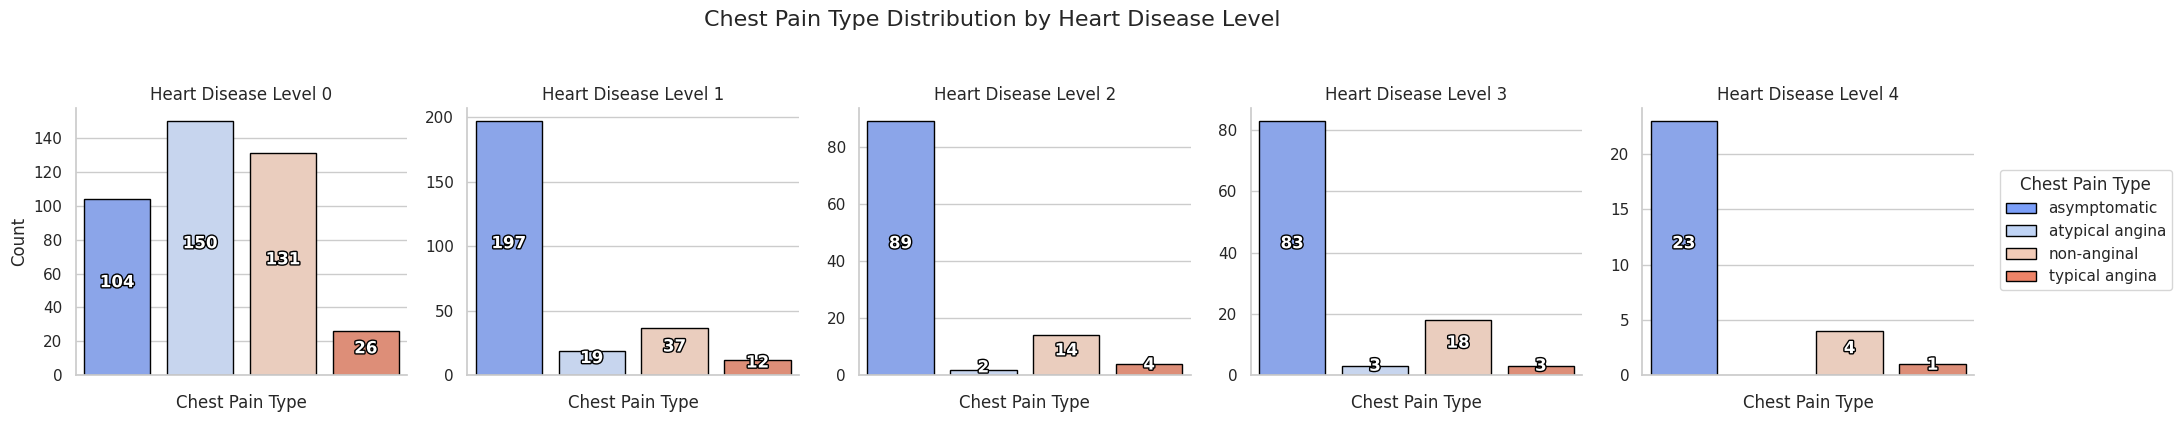

In [28]:
sorted_column_order = sorted(df["cp"].dropna().unique())
g = sns.FacetGrid(df, col="num", col_wrap=5, height=4, sharex=False, sharey=False)
g.map_dataframe(
    sns.countplot,
    x="cp",
    hue="cp",
    edgecolor="black",
    palette="coolwarm",
    hue_order=sorted_column_order,
    order=sorted_column_order
)

g.set_titles("Heart Disease Level {col_name}")
g.set_axis_labels("Chest Pain Type", "Count")

handles, labels = [], []
for cp_value, color in zip(sorted_column_order, sns.color_palette("coolwarm", len(sorted_column_order))):
    handles.append(plt.Rectangle((0, 0), 1, 1, fc=color, edgecolor="black"))
    labels.append(str(cp_value))

g.figure.legend(handles, labels, title="Chest Pain Type", bbox_to_anchor=(1, 0.5), loc='center left')

for ax in g.axes.flat:
    ax.set_xticklabels([])
    for p in ax.patches:
        height = p.get_height()
        if height > 0:
            text = ax.text(
                p.get_x() + p.get_width()/2, height/2, f"{int(height)}",
                ha="center", fontsize=12, color="white", weight="bold"
            )
            text.set_path_effects([
                path_effects.Stroke(linewidth=2, foreground="black"),
                path_effects.Normal()
            ])

plt.suptitle("Chest Pain Type Distribution by Heart Disease Level", fontsize=16, y=1.05)
plt.tight_layout()
plt.show()

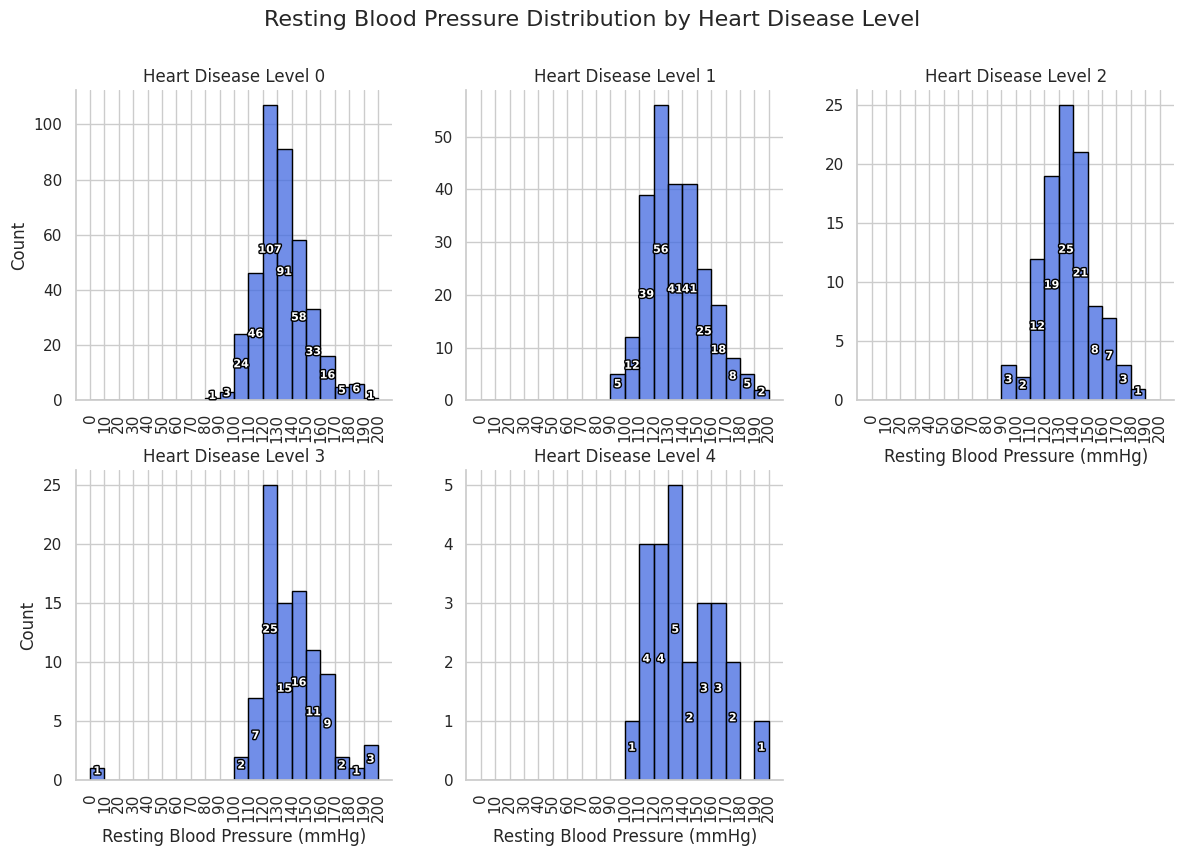

In [29]:
min_val, max_val = df["trestbps"].min(), df["trestbps"].max()

bins = np.arange(min_val, max_val + 1, 10)

g = sns.FacetGrid(df, col="num", col_wrap=3, height=4, sharex=False, sharey=False)
g.map_dataframe(sns.histplot, x="trestbps", bins=bins, color="royalblue", edgecolor="black")

g.set_titles("Heart Disease Level {col_name}")
g.set_axis_labels("Resting Blood Pressure (mmHg)", "Count")

for ax in g.axes.flat:
    ax.set_xticks(bins)
    ax.set_xticklabels([f"{b:.0f}" for b in bins], rotation=90)

    for p in ax.patches:
        height = p.get_height()
        if height > 0:
            text = ax.text(
                p.get_x() + p.get_width()/2, height/2, f"{int(height)}",
                ha="center", fontsize=8, color="white", weight="bold"
            )
            text.set_path_effects([path_effects.Stroke(linewidth=2, foreground="black"), path_effects.Normal()])
plt.suptitle("Resting Blood Pressure Distribution by Heart Disease Level", fontsize=16, y=1.05)
plt.show()

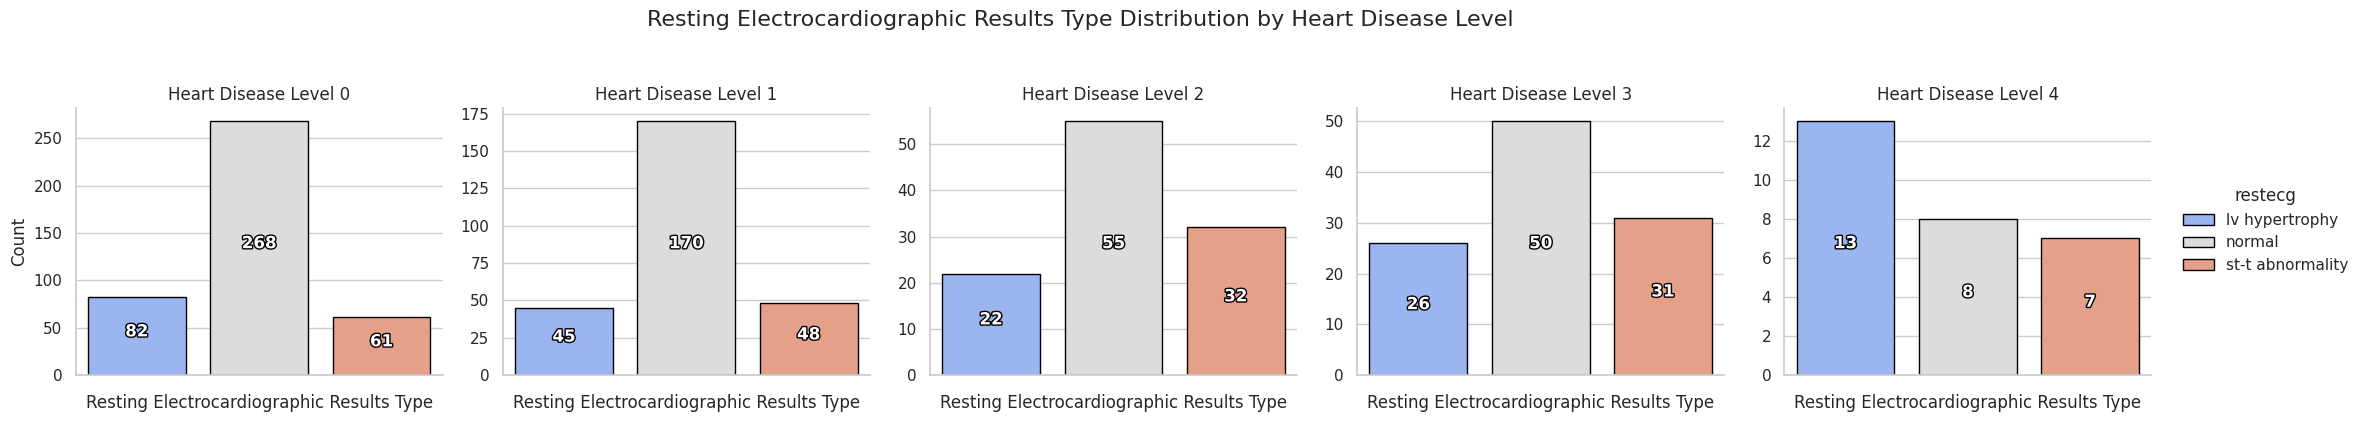

In [30]:
sorted_column_order = sorted(df["restecg"].dropna().unique())

g = sns.FacetGrid(df, col="num", col_wrap=5, height=4, sharex=False, sharey=False)
g.map_dataframe(sns.countplot, x="restecg", hue="restecg", edgecolor="black", palette="coolwarm", hue_order=sorted_column_order, order=sorted_column_order)

g.set_titles("Heart Disease Level {col_name}")
g.set_axis_labels("Resting Electrocardiographic Results Type", "Count")
g.add_legend(title="restecg", bbox_to_anchor=(1, 0.5), loc='center left')

for ax in g.axes.flat:
    ax.set_xticklabels([])
    for p in ax.patches:
        height = p.get_height()
        if height > 0:
            text = ax.text(
                p.get_x() + p.get_width()/2, height/2, f"{int(height)}",
                ha="center", fontsize=12, color="white", weight="bold"
            )
            text.set_path_effects([path_effects.Stroke(linewidth=2, foreground="black"), path_effects.Normal()])

plt.suptitle("Resting Electrocardiographic Results Type Distribution by Heart Disease Level", fontsize=16, y=1.05)
plt.tight_layout()
plt.show()


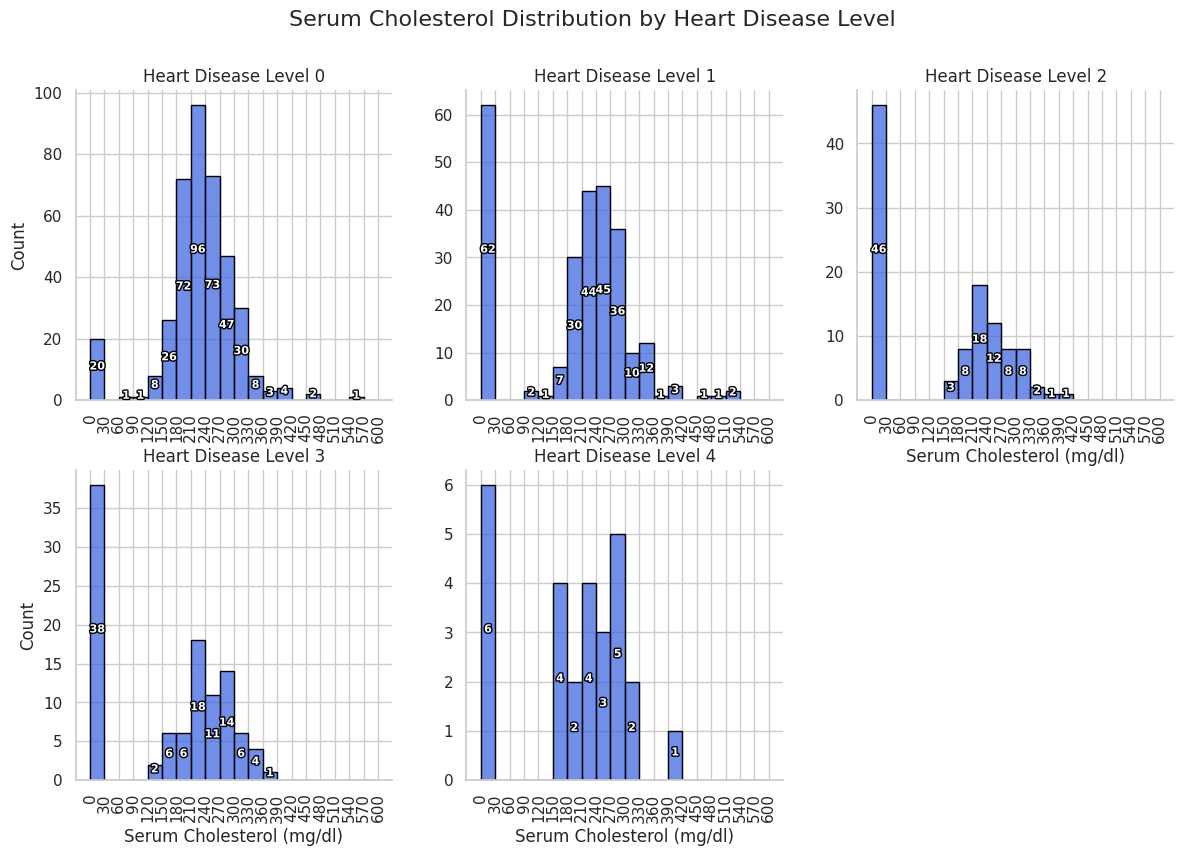

In [31]:
min_val, max_val = df["chol"].min(), df["chol"].max()

bins = np.arange(min_val, max_val, 30)

g = sns.FacetGrid(df, col="num", col_wrap=3, height=4, sharex=False, sharey=False)
g.map_dataframe(sns.histplot, x="chol", bins=bins, color="royalblue", edgecolor="black")

g.set_titles("Heart Disease Level {col_name}")
g.set_axis_labels("Serum Cholesterol (mg/dl)", "Count")

for ax in g.axes.flat:
    ax.set_xticks(bins)
    ax.set_xticklabels([f"{b:.0f}" for b in bins], rotation=90)

    for p in ax.patches:
        height = p.get_height()
        if height > 0:
            text = ax.text(
                p.get_x() + p.get_width()/2, height/2, f"{int(height)}",
                ha="center", fontsize=8, color="white", weight="bold"
            )
            text.set_path_effects([path_effects.Stroke(linewidth=2, foreground="black"), path_effects.Normal()])
plt.suptitle("Serum Cholesterol Distribution by Heart Disease Level", fontsize=16, y=1.05)
plt.show()

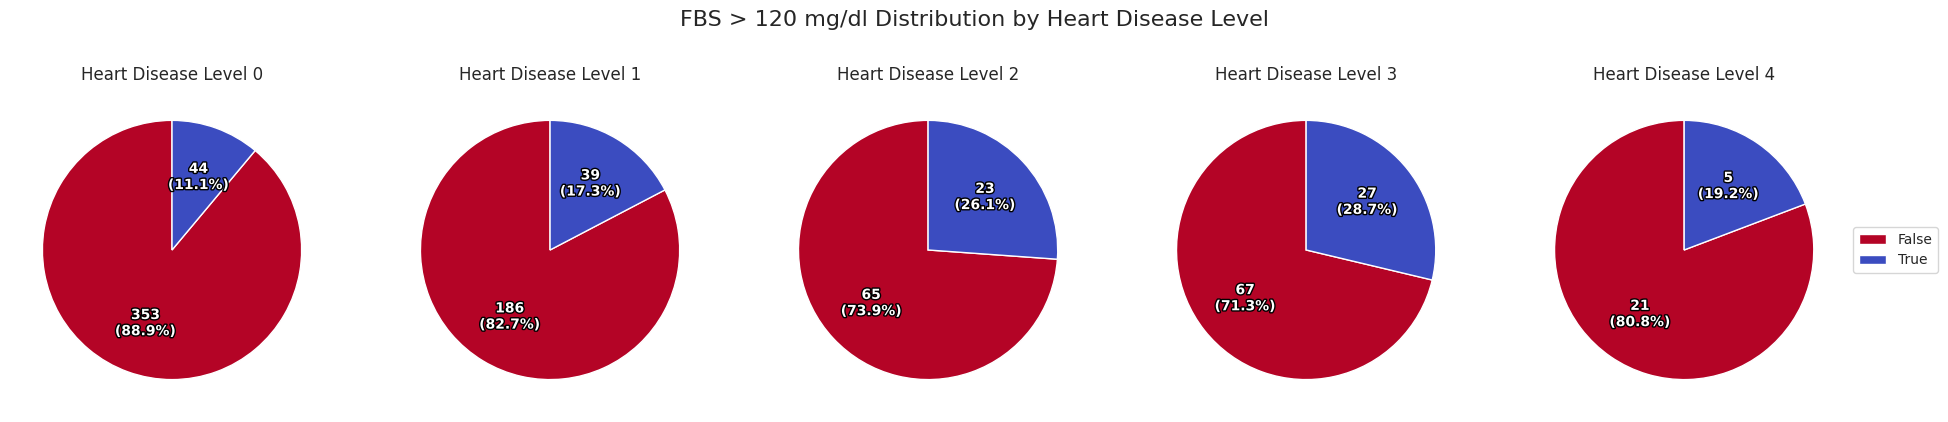

In [32]:
sorted_column_order = sorted(df["fbs"].dropna().unique()) #drop NaN values for pie chart
num_levels = sorted(df["num"].unique())

n_cols = 5
n_rows = int(np.ceil(len(num_levels) / n_cols))

fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 4, n_rows * 4))
axes = axes.flatten()

colors = plt.cm.coolwarm_r(np.linspace(0, 1, len(sorted_column_order)))


for i, num_level in enumerate(num_levels):
    ax = axes[i]
    subset = df[df["num"] == num_level]
    counts = subset["fbs"].value_counts().reindex(sorted_column_order, fill_value=0)

    total = counts.sum()

    # Custom label function
    def make_label(pct, allvals):
        count = int(round(pct * total / 100.0))
        return f"{count}\n({pct:.1f}%)"

    wedges, texts, autotexts = ax.pie(
        counts,
        labels=None,
        autopct=lambda pct: make_label(pct, counts),
        startangle=90,
        colors=colors,
        textprops={'color': "white", 'weight': 'semibold', 'fontsize': 10}
    )
    for text in autotexts:
        text.set_path_effects([path_effects.Stroke(linewidth=2, foreground='black'), path_effects.Stroke()])

    ax.set_title(f"Heart Disease Level {num_level}", fontsize=12)

ax.legend(
        handles=wedges,
        labels=sorted_column_order,
        loc="center left",
        bbox_to_anchor=(1, 0.5),
        fontsize=10
    )

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

fig.suptitle("FBS > 120 mg/dl Distribution by Heart Disease Level", fontsize=16, y=1.05)
plt.tight_layout()
plt.show()


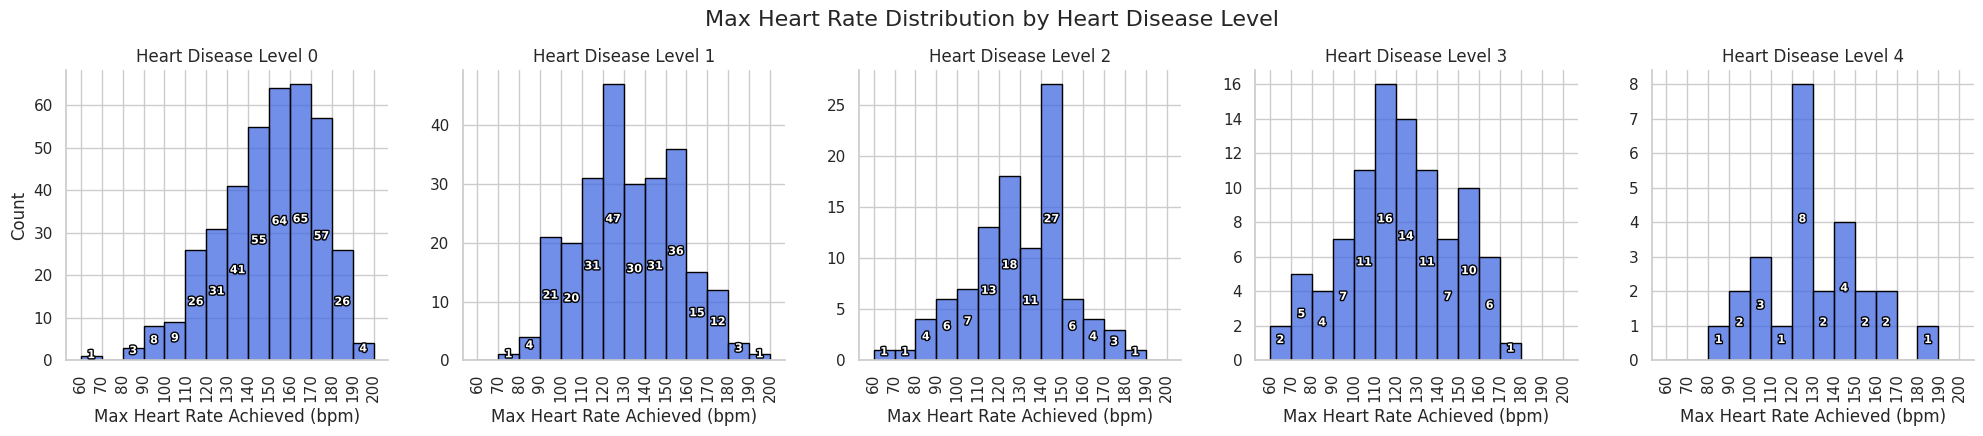

In [33]:
min_val, max_val = df["thalach"].min(), df["thalach"].max()

bins = np.arange(min_val, max_val + 1, 10)

g = sns.FacetGrid(df, col="num", col_wrap=5, height=4, sharex=False, sharey=False)
g.map_dataframe(sns.histplot, x="thalach", bins=bins, color="royalblue", edgecolor="black")

g.set_titles("Heart Disease Level {col_name}")
g.set_axis_labels("Max Heart Rate Achieved (bpm)", "Count")

for ax in g.axes.flat:
    ax.set_xticks(bins)
    ax.set_xticklabels([f"{b:.0f}" for b in bins], rotation=90)

    for p in ax.patches:
        height = p.get_height()
        if height > 0:
            text = ax.text(
                p.get_x() + p.get_width()/2, height/2, f"{int(height)}",
                ha="center", fontsize=8, color="white", weight="bold"
            )
            # Apply outline effect
            text.set_path_effects([path_effects.Stroke(linewidth=2, foreground="black"), path_effects.Normal()])
plt.suptitle("Max Heart Rate Distribution by Heart Disease Level", fontsize=16, y=1.05)
plt.show()

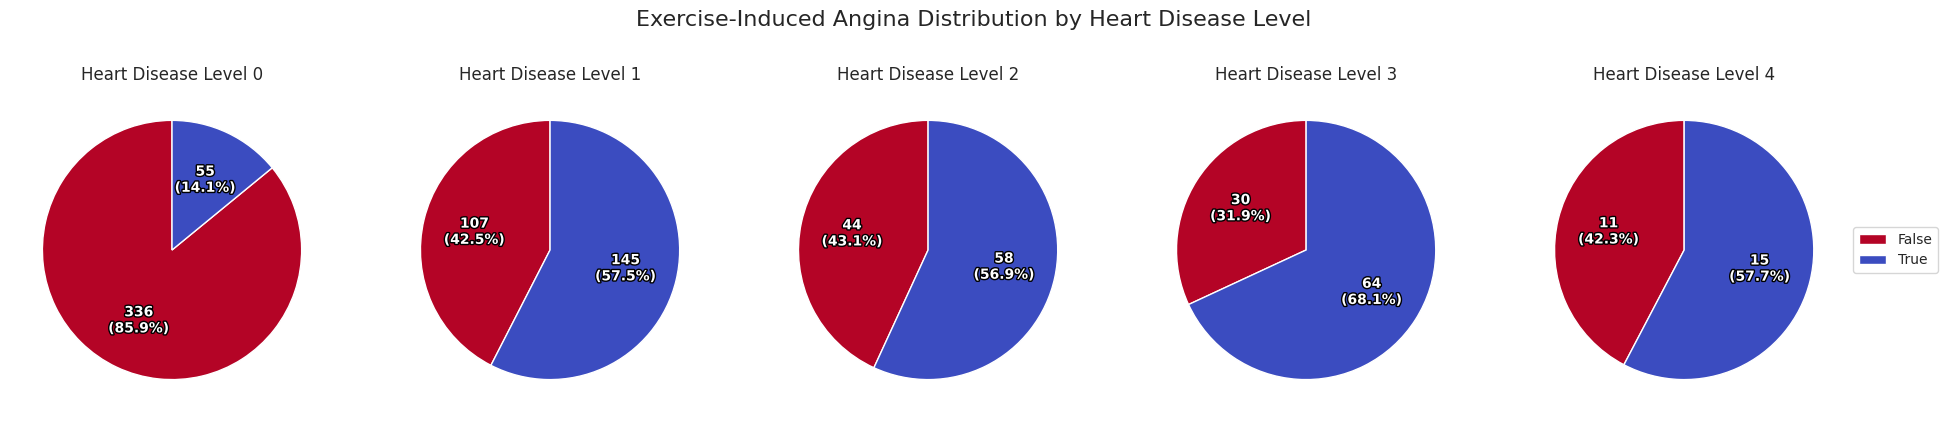

In [34]:
sorted_column_order = sorted(df["exang"].dropna().unique()) #drop NaN values for pie chart
num_levels = sorted(df["num"].unique())

n_cols = 5
n_rows = int(np.ceil(len(num_levels) / n_cols))

fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols * 4, n_rows * 4))
axes = axes.flatten()

colors = plt.cm.coolwarm_r(np.linspace(0, 1, len(sorted_column_order)))


for i, num_level in enumerate(num_levels):
    ax = axes[i]
    subset = df[df["num"] == num_level]
    counts = subset["exang"].value_counts().reindex(sorted_column_order, fill_value=0)

    total = counts.sum()

    # Custom label function
    def make_label(pct, allvals):
        count = int(round(pct * total / 100.0))
        return f"{count}\n({pct:.1f}%)"

    wedges, texts, autotexts = ax.pie(
        counts,
        labels=None,  # Disable outer labels
        autopct=lambda pct: make_label(pct, counts),
        startangle=90,
        colors=colors,
        textprops={'color': "white", 'weight': 'semibold', 'fontsize': 10}
    )
    for text in autotexts:
        text.set_path_effects([path_effects.Stroke(linewidth=2, foreground='black'), path_effects.Stroke()])

    ax.set_title(f"Heart Disease Level {num_level}", fontsize=12)

    # Add legend outside the chart
ax.legend(
        handles=wedges,
        labels=sorted_column_order,
        loc="center left",
        bbox_to_anchor=(1, 0.5),
        fontsize=10
    )

# Remove unused axes
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

fig.suptitle("Exercise-Induced Angina Distribution by Heart Disease Level", fontsize=16, y=1.05)
plt.tight_layout()
plt.show()


[-3.  -2.5 -2.  -1.5 -1.  -0.5  0.   0.5  1.   1.5  2.   2.5  3.   3.5
  4.   4.5  5.   5.5  6.   6.5]


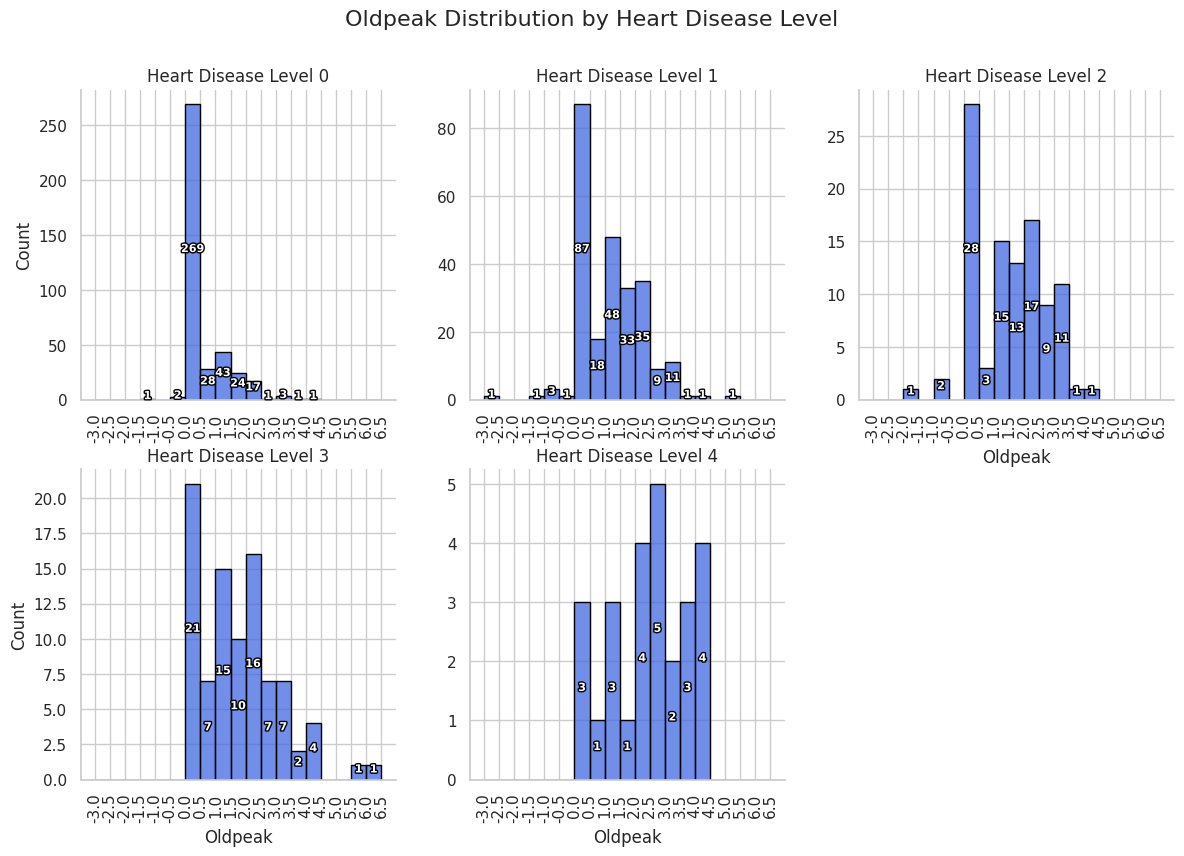

In [35]:
bin_width = 0.5

min_val = np.floor(df["oldpeak"].min() / bin_width) * bin_width
max_val = np.ceil(df["oldpeak"].max() / bin_width) * bin_width

# Generate aligned bins
bins = np.arange(min_val, max_val + bin_width, bin_width)

g = sns.FacetGrid(df, col="num", col_wrap=3, height=4, sharex=False, sharey=False)
g.map_dataframe(sns.histplot, x="oldpeak", bins=bins, color="royalblue", edgecolor="black")

g.set_titles("Heart Disease Level {col_name}")
g.set_axis_labels("Oldpeak", "Count")
print(bins)
for ax in g.axes.flat:
    ax.set_xticks(bins)
    ax.set_xticklabels([f"{b:.1f}" for b in bins], rotation=90)

    for p in ax.patches:
        height = p.get_height()
        if height > 0:
            text = ax.text(
                p.get_x() + p.get_width()/2, height/2, f"{int(height)}",
                ha="center", fontsize=8, color="white", weight="bold"
            )
            # Apply outline effect
            text.set_path_effects([path_effects.Stroke(linewidth=2, foreground="black"), path_effects.Normal()])
plt.suptitle("Oldpeak Distribution by Heart Disease Level", fontsize=16, y=1.05)
plt.show()

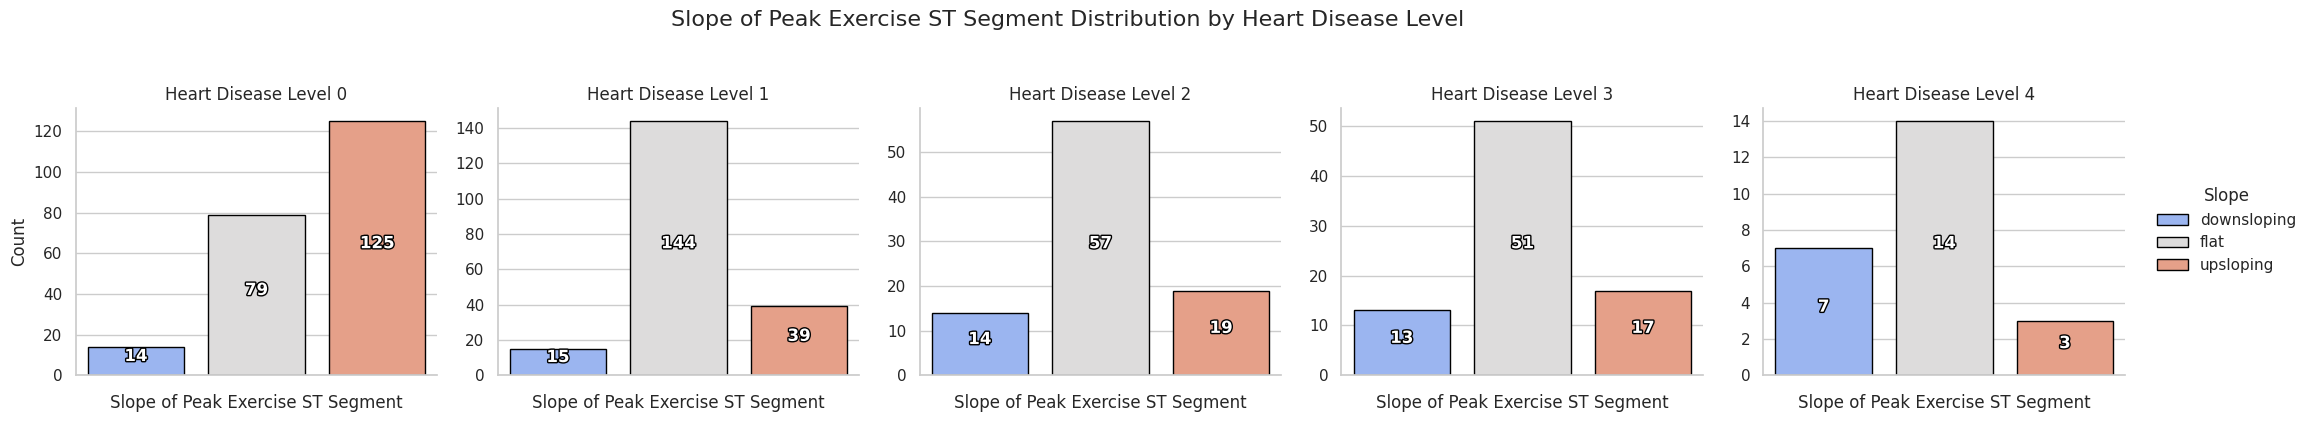

In [36]:
sorted_column_order = sorted(df["slope"].dropna().unique())

g = sns.FacetGrid(df, col="num", col_wrap=5, height=4, sharex=False, sharey=False)
g.map_dataframe(sns.countplot, x="slope", hue="slope", edgecolor="black", palette="coolwarm", hue_order=sorted_column_order, order=sorted_column_order)

g.set_titles("Heart Disease Level {col_name}")
g.set_axis_labels("Slope of Peak Exercise ST Segment", "Count")
g.add_legend(title="Slope", bbox_to_anchor=(1, 0.5), loc='center left')

for ax in g.axes.flat:
    ax.set_xticklabels([])
    for p in ax.patches:
        height = p.get_height()
        if height > 0:
            text = ax.text(
                p.get_x() + p.get_width()/2, height/2, f"{int(height)}",
                ha="center", fontsize=12, color="white", weight="bold"
            )
            text.set_path_effects([path_effects.Stroke(linewidth=2, foreground="black"), path_effects.Normal()])

plt.suptitle("Slope of Peak Exercise ST Segment Distribution by Heart Disease Level", fontsize=16, y=1.05)
plt.tight_layout()
plt.show()


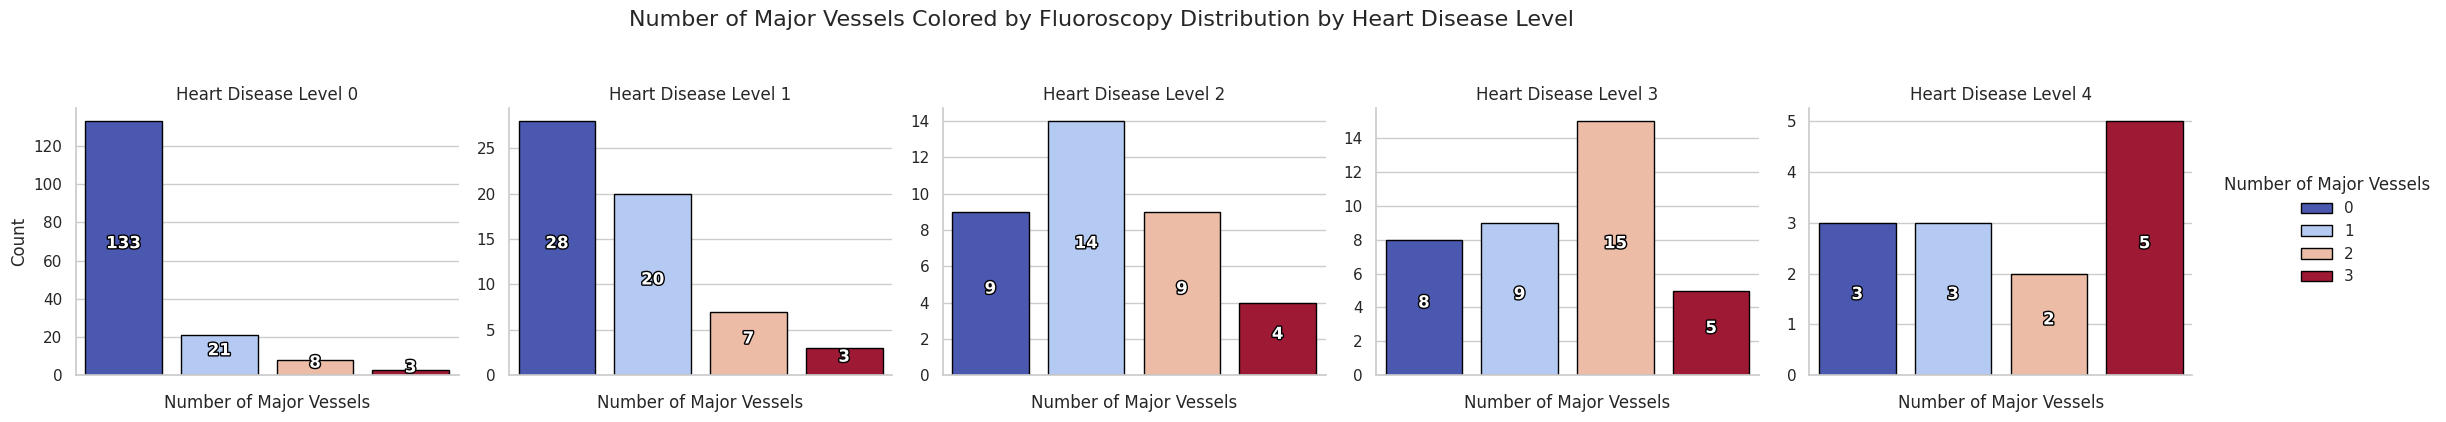

In [37]:
# Ensure 'ca' values are sorted integers
sorted_column_order = sorted(df["ca"].dropna().unique())
sorted_column_order_int = [int(x) for x in sorted_column_order]  # for display/legend

g = sns.FacetGrid(df, col="num", col_wrap=5, height=4, sharex=False, sharey=False)
g.map_dataframe(
    sns.countplot,
    x="ca",
    hue="ca",
    edgecolor="black",
    palette="coolwarm",
    hue_order=sorted_column_order,
    order=sorted_column_order
)

g.set_titles("Heart Disease Level {col_name}")
g.set_axis_labels("Number of Major Vessels", "Count")

# Set the legend
g.add_legend(title="Number of Major Vessels", bbox_to_anchor=(1, 0.5), loc='center left')

# Update legend labels to integers
for t, label in zip(g._legend.texts, sorted_column_order_int):
    t.set_text(str(label))

for ax in g.axes.flat:
    ax.set_xticklabels([])
    for p in ax.patches:
        height = p.get_height()
        if height > 0:
            text = ax.text(
                p.get_x() + p.get_width()/2, height/2, f"{int(height)}",
                ha="center", fontsize=12, color="white", weight="bold"
            )
            text.set_path_effects([
                path_effects.Stroke(linewidth=2, foreground="black"),
                path_effects.Normal()
            ])

plt.suptitle("Number of Major Vessels Colored by Fluoroscopy Distribution by Heart Disease Level", fontsize=16, y=1.05)
plt.tight_layout()
plt.show()


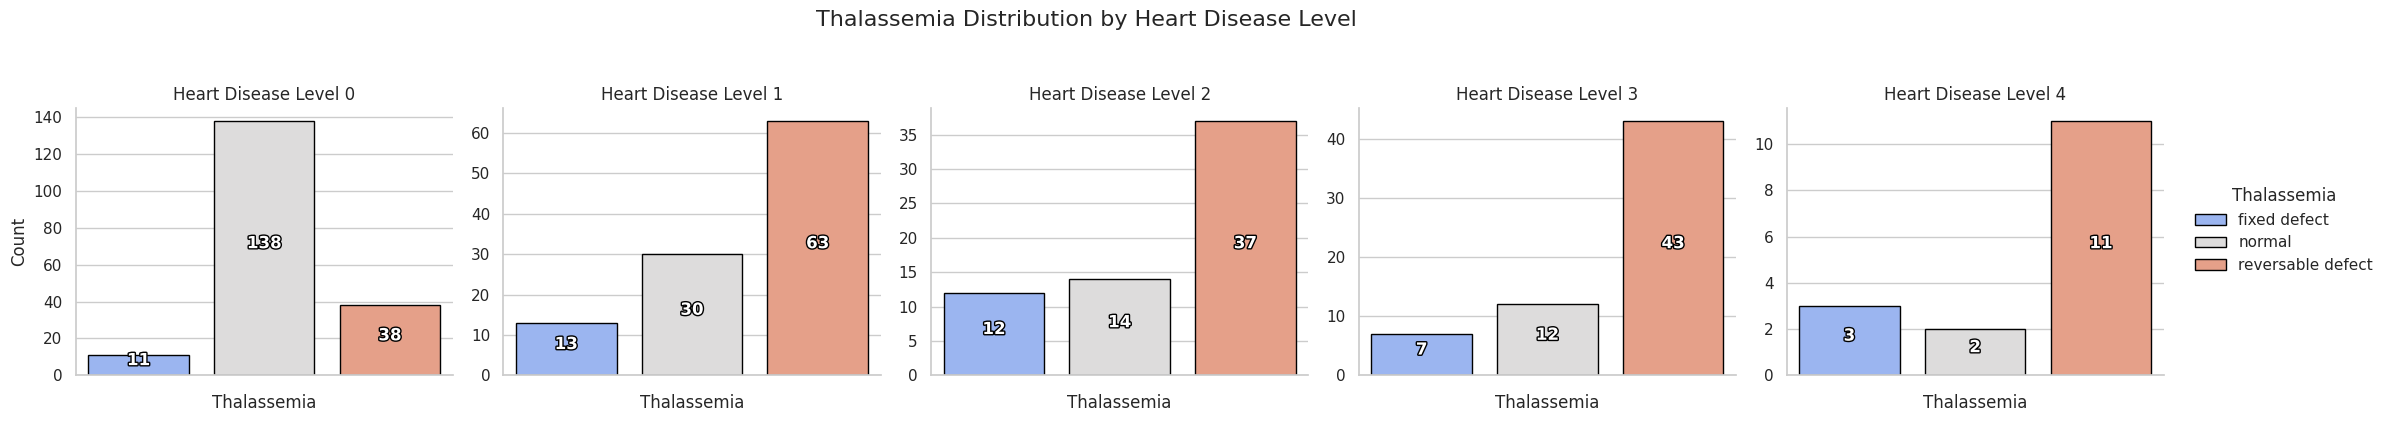

In [38]:
sorted_column_order = sorted(df["thal"].dropna().unique())

g = sns.FacetGrid(df, col="num", col_wrap=5, height=4, sharex=False, sharey=False)
g.map_dataframe(sns.countplot, x="thal", hue="thal", edgecolor="black", palette="coolwarm", hue_order=sorted_column_order, order=sorted_column_order)

g.set_titles("Heart Disease Level {col_name}")
g.set_axis_labels("Thalassemia", "Count")
g.add_legend(title="Thalassemia", bbox_to_anchor=(1, 0.5), loc='center left')

for ax in g.axes.flat:
    ax.set_xticklabels([])
    for p in ax.patches:
        height = p.get_height()
        if height > 0:
            text = ax.text(
                p.get_x() + p.get_width()/2, height/2, f"{int(height)}",
                ha="center", fontsize=12, color="white", weight="bold"
            )
            text.set_path_effects([path_effects.Stroke(linewidth=2, foreground="black"), path_effects.Normal()])

plt.suptitle("Thalassemia Distribution by Heart Disease Level", fontsize=16, y=1.05)
plt.tight_layout()
plt.show()


## **EDA Conclusion**

From the data load and EDA done before here is some conclusion we can differ:
- some columns have null or empty value including trestbps, chol, fbs, restecg, thalach, exang, oldpeak, slope, ca and thal
- the average value of participant age is 53.51 years old
- based on sex distribution the heart disease has higher rate to happen on male than female
- there is no participant from hungary that suffer heart disease higher than level 1 (mild)
- most of the participant feel the asymptomatic chest pain type
- there is an invalid resting blood pressure data which having value of 0
- there are 172 invalid Cholesterol data which having value of 0
- the rate of participant who suffer heart disease when having fasting blood sugar above 120 mg/dl is higher than the rate of participant who doesn't suffer heart disease when having fbs above 120 mg/dl
- participant with Exercise-Induced Angina has higher rate to suffer heart disease
- usually oldpeak treated as non-negative value but the data showing that some records having negative value
- for participant that didnt suffer heart disease most of them having upsloping type for slope of peak exercise ST Segment, for participant that suffer heart disease most of them having flat type.
- the trend of major vessel on participant is increasing based on level of heart disease
- for thalassemia type, participant without heart disease mostly having normal type, for participant with heart disease dominated by reversable defect type.

# **5. Data Preprocessing**

In [39]:
df = df.drop(columns=['id'])

df['ca'] = df['ca'].astype('Int64')
df['thalach'] = df['thalach'].astype('Int64')

target_column = 'num'

# === Step 4 & 5: Handle ca and thalach ===
if 'ca' in df.columns:
    df['ca'] = df['ca'].fillna(0).astype(int)

if 'thalach' in df.columns:
    df['thalach'] = df['thalach'].fillna(0).astype(int)

# === Save header (excluding target) ===
feature_columns = df.columns.drop(target_column)

# === Identify feature types ===
int_numeric_features = df[feature_columns].select_dtypes(include=['int64']).columns.tolist()
float_numeric_features = df[feature_columns].select_dtypes(include=['float64']).columns.tolist()
categorical_features = df[feature_columns].select_dtypes(include=['object']).columns.tolist()

# === Step 2 & 3: Define special imputer (treat 0 and NaN as missing) ===
def mark_0_as_nan(X):
    X = X.copy()
    X[(X == 0) | (pd.isna(X))] = np.nan
    return X

special_numeric_imputer = Pipeline(steps=[
    ('zero_to_nan', FunctionTransformer(mark_0_as_nan, validate=False)),
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

# === Separate special columns ===
special_numeric_features = []
for col in ['trestbps', 'chol']:
    if col in float_numeric_features:
        special_numeric_features.append(col)
        float_numeric_features.remove(col)
    if col in int_numeric_features:
        special_numeric_features.append(col)
        int_numeric_features.remove(col)

# === Normal numeric pipeline ===
int_numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('scaler', StandardScaler())
])

float_numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

# === Categorical pipeline ===
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

# === Combine all into ColumnTransformer ===
preprocessor = ColumnTransformer(transformers=[
    ('num_int', int_numeric_transformer, int_numeric_features),
    ('num_float', float_numeric_transformer, float_numeric_features),
    ('num_special', special_numeric_imputer, special_numeric_features),
    ('cat', categorical_transformer, categorical_features)
])

# === Split features and target ===
X = df.drop(columns=[target_column])
y = df[target_column]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
print(X_train)
# === Fit-transform ===
X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

     age     sex         origin               cp  trestbps   chol    fbs  \
363   43  Female        Hungary  atypical angina     120.0  201.0  False   
481   59  Female        Hungary  atypical angina     130.0  188.0  False   
650   55    Male    Switzerland     asymptomatic     120.0    0.0  False   
483   59    Male        Hungary      non-anginal     130.0  318.0  False   
355   42  Female        Hungary      non-anginal     115.0  211.0  False   
..   ...     ...            ...              ...       ...    ...    ...   
106   59    Male      Cleveland     asymptomatic     140.0  177.0  False   
270   61    Male      Cleveland     asymptomatic     140.0  207.0  False   
860   75    Male  VA Long Beach     asymptomatic     160.0  310.0   True   
435   53  Female        Hungary  atypical angina     140.0  216.0  False   
102   57  Female      Cleveland     asymptomatic     128.0  303.0  False   

              restecg  thalach  exang  oldpeak        slope  ca  \
363            norma

In [43]:
X_train[0:5]
script_dir = os.getcwd()
X_train_csv_path = os.path.join(script_dir, 'dataset_preprocessing', 'X_train.csv')
X_test_csv_path = os.path.join(script_dir, 'dataset_preprocessing', 'X_test.csv')
y_train_csv_path = os.path.join(script_dir, 'dataset_preprocessing', 'y_train.csv')
y_test_csv_path = os.path.join(script_dir, 'dataset_preprocessing', 'y_test.csv')
pd.DataFrame(X_train).to_csv(X_train_csv_path, index=False)
pd.DataFrame(X_test).to_csv(X_test_csv_path, index=False)
pd.DataFrame(y_train).to_csv(y_train_csv_path, index=False)
pd.DataFrame(y_test).to_csv(y_test_csv_path, index=False)
print("Preprocessing completed and files saved successfully.")

Preprocessing completed and files saved successfully.
